# Import

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Kinetik Model

In [20]:
def complete_model(y, t, params):
    mRNA_LhGR, LhGR, Dex, Dex_LhGR, TMV = y

    # parameter
    k_transcr_LhGR = params['k_transcr_LhGR']
    k_degrad_mRNA = params['k_degrad_mRNA']
    k_transl_LhGR = params['k_transl_LhGR']
    k_degrad_LhGR = params['k_degrad_LhGR']
    gene_LhGR = params['gene_LhGR']
    k_on = params['k_on']
    k_off = params['k_off']
    alpha = params['alpha']
    Kd = params['Kd']
    n = params['n']
    k_degrad_TMV = params['k_degrad_TMV']

    # ordinary differential equation
    dmRNA_LhGR_dt = k_transcr_LhGR * gene_LhGR - k_degrad_mRNA * mRNA_LhGR
    dLhGR_dt = k_transl_LhGR * mRNA_LhGR - k_degrad_LhGR * LhGR - k_on * Dex * LhGR + k_off * Dex_LhGR
    dDex_dt = -k_on * Dex * LhGR + k_off * Dex_LhGR
    dDex_LhGR_dt = k_on * Dex * LhGR - k_off * Dex_LhGR
    dTMV_dt = (alpha * (Dex_LhGR**n)/(Kd + Dex_LhGR**n)) - k_degrad_TMV * TMV

    return [dmRNA_LhGR_dt, dLhGR_dt, dDex_dt, dDex_LhGR_dt, dTMV_dt]

In [21]:
# Parameter model
params = {
    'k_transcr_LhGR': 0.034,      # 30 basa/s / 881 residu
    'k_degrad_mRNA': 0.0005775,   # degradasi mRNA
    'k_transl_LhGR': 0.026,       # 7.5 aa/s / (881/3)
    'k_degrad_LhGR': 0.0005775,   # diasumsikan sama dengan degradasi mRNA
    'gene_LhGR': 1.0,             # jumlah gen LhGR (normalized)
    'k_on': 5.1e3,                # konstanta pengikatan
    'k_off': 2e-6,             # 1.2x10^-4 min^-1 dikonversi ke s^-1
    'alpha': 0.0112,              # laju transkripsi maksimal TMV
    'Kd': 5.2e-9,                   # konstanta disosiasi
    'n': 2,                       # koefisien Hill (diasumsikan)
    'k_degrad_TMV': 0.00027              # degradasi TMV
}

# Prediksi Dosis Dexamethasone

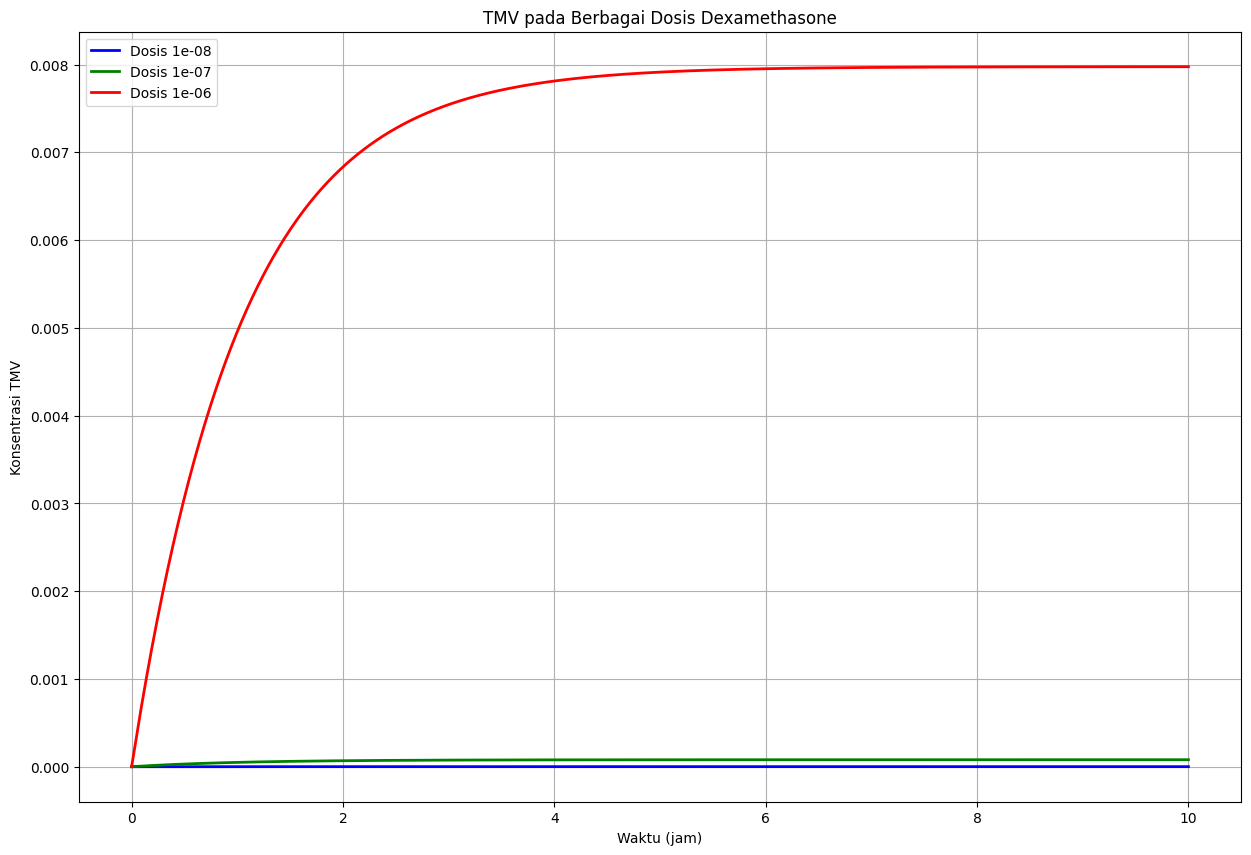

In [37]:
dosis = [1e-8, 1e-7, 1e-6]
results = []


plt.figure(figsize=(15,10))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, dose in enumerate(dosis):
    y0 = [0, 0, dose, 0, 0]

    # Menyelesaikan sistem persamaan diferensial
    solution = odeint(complete_model, y0, t, args=(params,))

    # Menyimpan hasil
    results.append({
        'dosis': dose,
        'TMV_maks': np.max(solution[:, 4]),
        'TMV_akhir': solution[-1, 4],
        'LhGR_maks': np.max(solution[:, 1]),
        'Dex_LhGR_maks': np.max(solution[:, 3])
    })

    plt.plot(t/3600, solution[:, 4], label=f'Dosis {dose}', color=colors[i], linewidth=2)
    
plt.title('TMV pada Berbagai Dosis Dexamethasone')
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi TMV')
plt.legend()
plt.grid(True)

# Hasil Akhir

In [38]:
# Kondisi awal
y0 = [0, 0, 1e-6, 0, 0]  # [mRNA_LhGR, LhGR, Dex, Dex_LhGR, TMV]

# Waktu simulasi (24 jam dalam detik)
t = np.linspace(0, 10*3600, 1000)

solution = odeint(complete_model, y0, t, args=(params,))

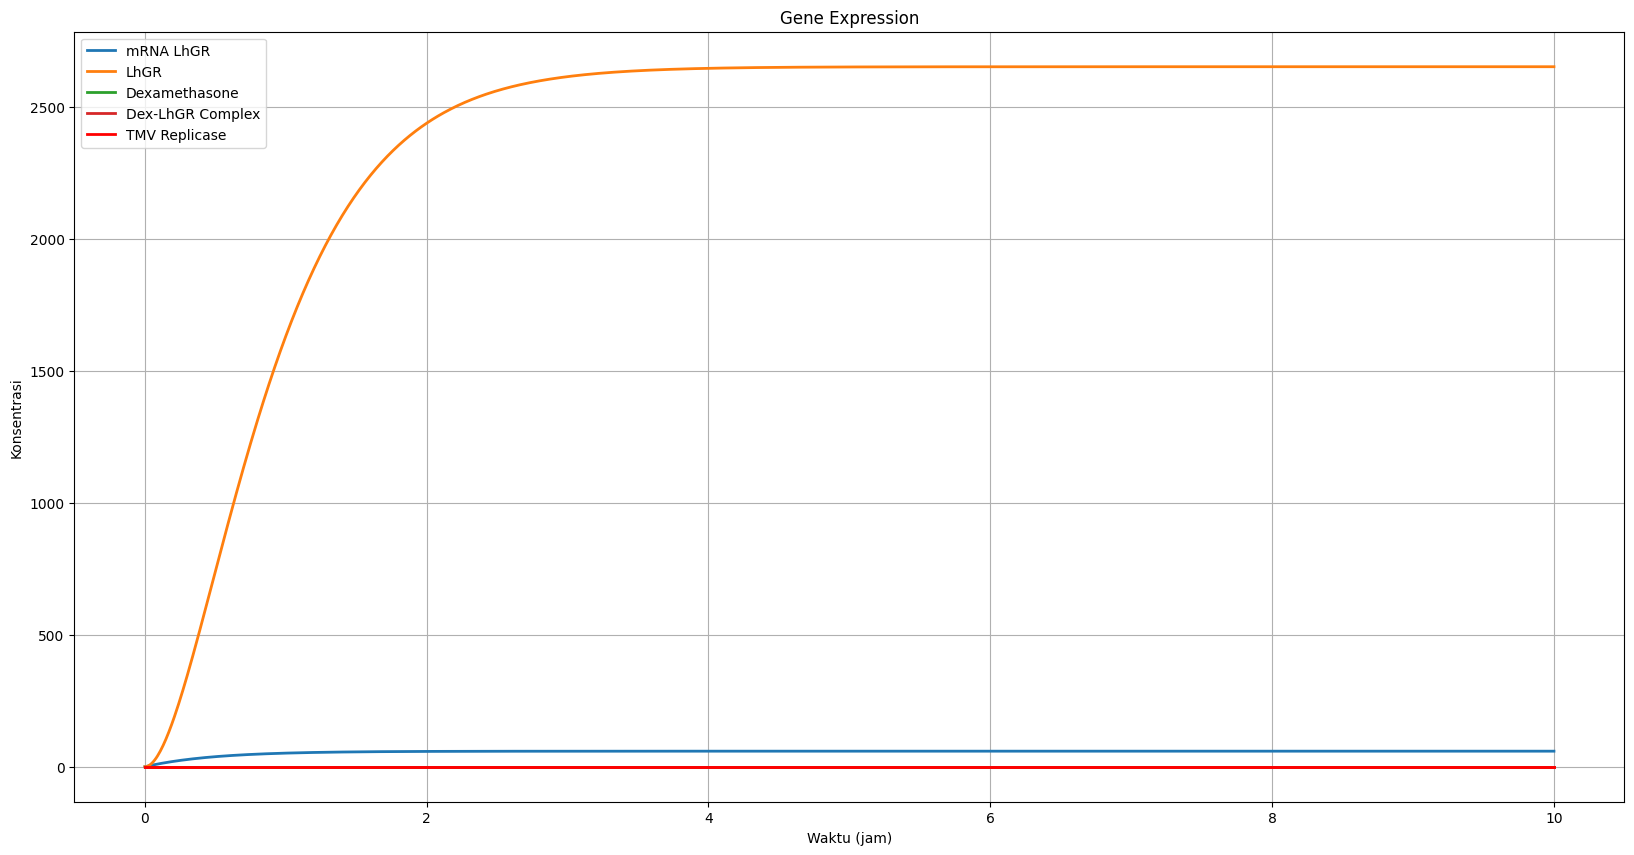

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(t/3600, solution[:, 0], label='mRNA LhGR', linewidth=2)
plt.plot(t/3600, solution[:, 1], label='LhGR', linewidth=2)
plt.plot(t/3600, solution[:, 2], label='Dexamethasone', linewidth=2)
plt.plot(t/3600, solution[:, 3], label='Dex-LhGR Complex', linewidth=2)
plt.plot(t/3600, solution[:, 4], label='TMV Replicase', color='red', linewidth=2)
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi')
plt.title('Gene Expression')
plt.legend()
plt.grid(True)
plt.show()

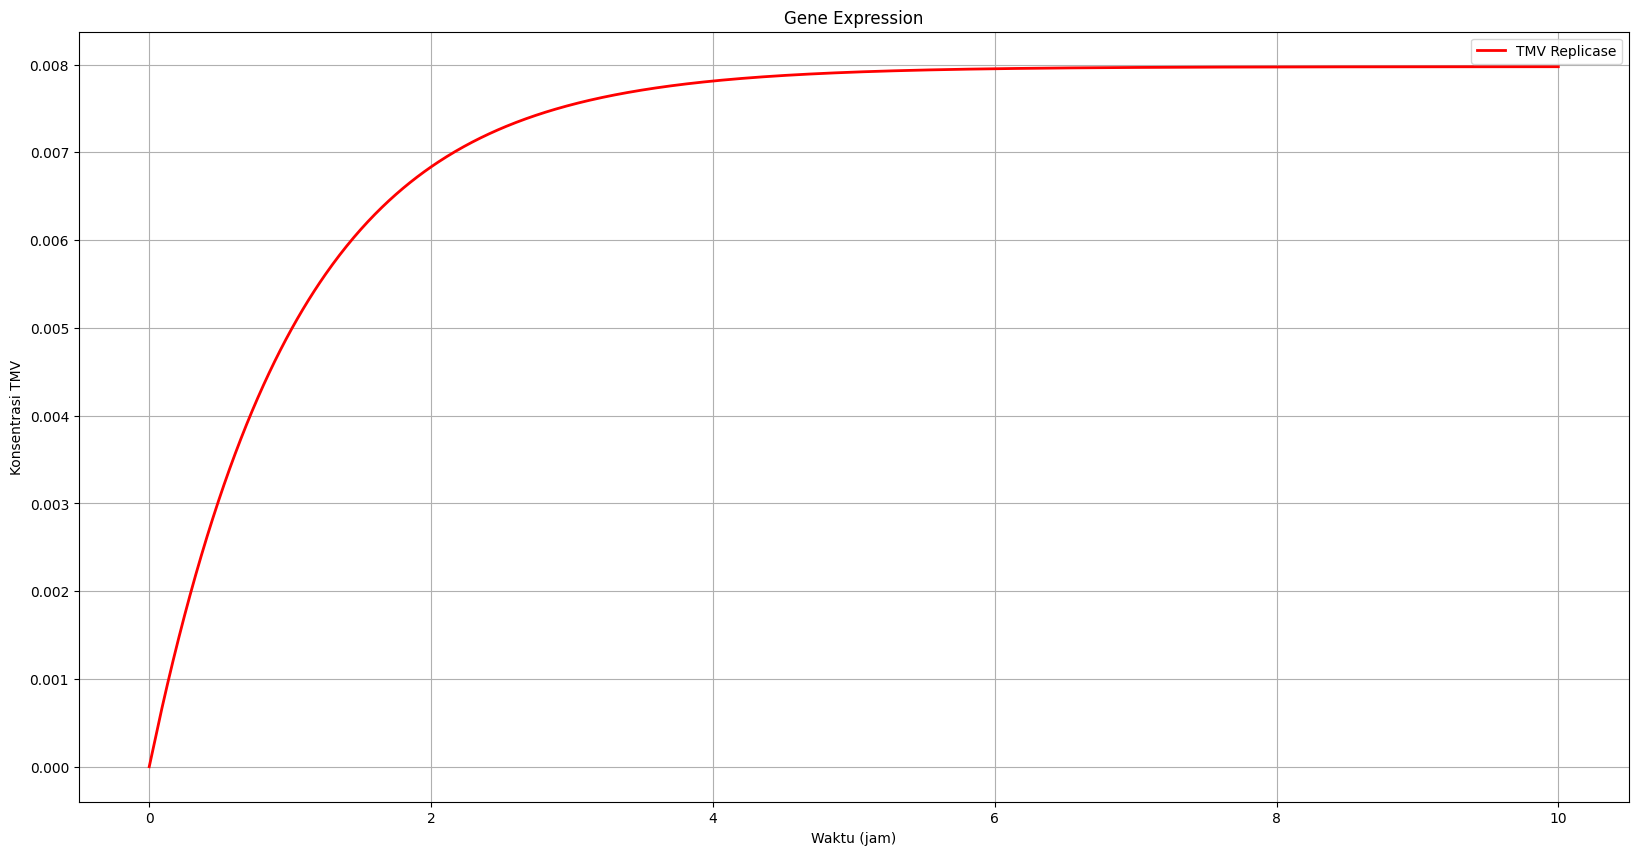

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(t/3600, solution[:, 4], label='TMV Replicase', color='red', linewidth=2)
plt.xlabel('Waktu (jam)')
plt.ylabel('Konsentrasi TMV')
plt.title('Gene Expression')
plt.legend()
plt.grid(True)
plt.show()